<a href="https://colab.research.google.com/github/raysky9999/preScreen/blob/main/PreScreen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view."

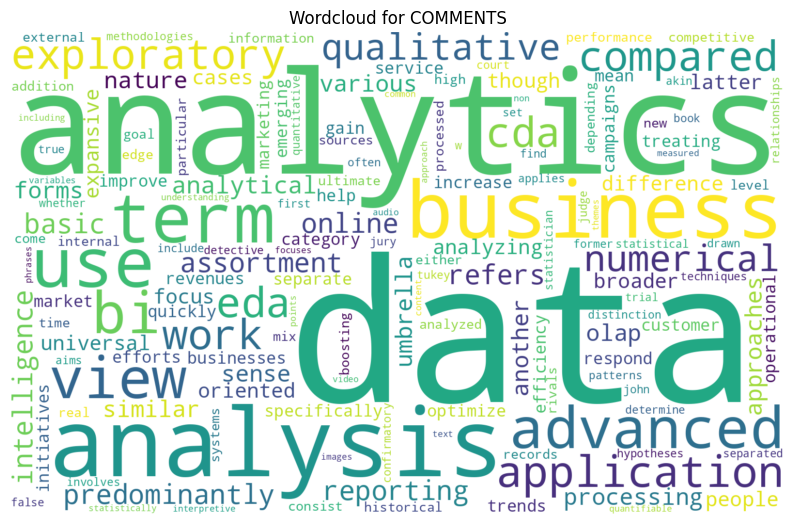

In [3]:
# Wordcloud visualization for data
from wordcloud import WordCloud

all_comments = data.lower()
wordcloud = WordCloud(width=1600, height=1000, max_words=1000, background_color='white').generate(all_comments)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for COMMENTS")
plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
bagOwords = CountVectorizer()
count_array = bagOwords.fit_transform([data]).toarray()
df = pd.DataFrame(data=count_array,columns = bagOwords.get_feature_names_out())
print(df)

   1977  about  addition  advanced  aims  akin  all  also  an  analysis  ...  \
0     1      1         1         2     1     1    1     1   1         6  ...   

   uses  variables  various  video  view  whether  which  while  with  work  
0     2          1        1      1     2        1      2      2     3     2  

[1 rows x 190 columns]


In [5]:
df['data']

0    18
Name: data, dtype: int64

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.tokenize import sent_tokenize
lines = sent_tokenize(data.lower())

for line in lines:
  print(line)
  count_array = bagOwords.fit_transform([line]).toarray()
  df = pd.DataFrame(data=count_array,columns = bagOwords.get_feature_names_out())
  print(df['data'])
print(len(lines))

as a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced analytics.
0    1
Name: data, dtype: int64
in that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus.
0    2
Name: data, dtype: int64
the expansive view of the term isn't universal, though: in some cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate category.
0    1
Name: data, dtype: int64
data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting busines

since the word data occurs in every sentence we can say it's 100% likelihood it will occur in every sentence.
another way we can be more precise is taking the number of data occurances overall over the total number of sentences so 18/11 = 163% probability it will occur


In [8]:
counts = []
line_no = []
i=1;
for line in lines:
  count_array = bagOwords.fit_transform([line]).toarray()
  #print(bagOwords.get_feature_names_out())
  counts.append(len(bagOwords.get_feature_names_out()))
  line_no.append(i)
  i=i+1
line_no_series=pd.Series(line_no,name='line_no')
lines_series=pd.Series(lines,name='lines')
counts_series=pd.Series(counts,name='counts')
df = pd.concat([line_no_series,lines_series,counts_series],axis=1)
df

,line_no,lines,counts
0,1,"as a term, data analytics predominantly refers...",25
1,2,"in that sense, it's similar in nature to busin...",27
2,3,the expansive view of the term isn't universal...,24
3,4,data analytics initiatives can help businesses...,39
4,5,"depending on the particular application, the d...",25
5,6,"in addition, it can come from a mix of interna...",14
6,7,"at a high level, data analytics methodologies ...",32
7,8,"eda is often compared to detective work, while...",32
8,9,data analytics can also be separated into quan...,11
9,10,the former involves analysis of numerical data...,17


the data frame shows the #words per sentences, hence the distribution is from 14 to 39

<Axes: ylabel='counts'>

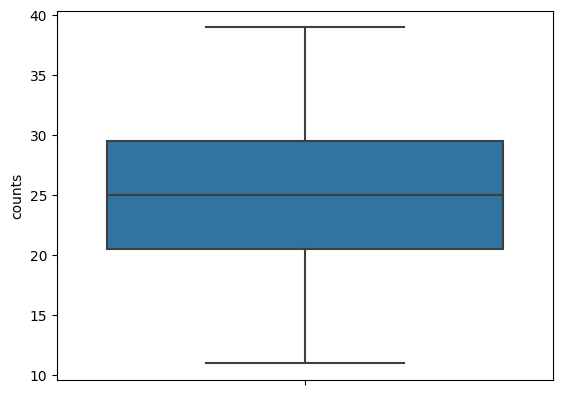

In [9]:
sns.boxplot(y=df['counts'])


array([[<Axes: title={'center': 'line_no'}>,
        <Axes: title={'center': 'counts'}>]], dtype=object)

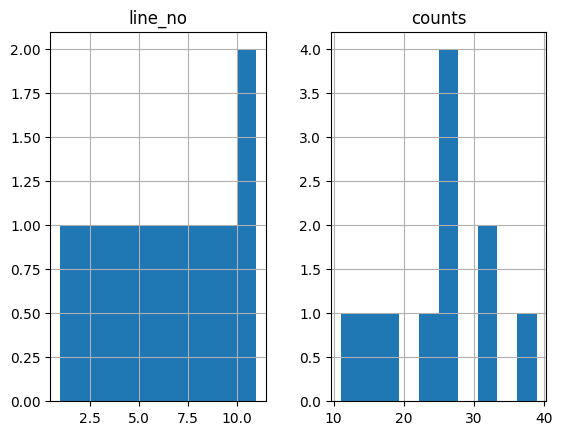

In [10]:
df.hist()

In [11]:
words: list[str] = nltk.word_tokenize(data.lower())
fd = nltk.FreqDist(words)
fd.tabulate(3)

   , data   to 
  23   18   11 


In [12]:
finder = nltk.collocations.BigramCollocationFinder.from_words(words)
finder.ngram_fd.tabulate(2)

('data', 'analytics')  ('data', 'analysis') 
                    6                     5 


data occurs 18 times, data analytics bigram occurs 6 times, so the probability can be computed as 6 out of 18 times, so one third of the times the word data occurs the following word is analytics.

33.33%
